In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [8]:
# PCA- feature selection adn extraction in sucha way that variance is maximized
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data=pca.fit_transform(scaled_data)
pca_data

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

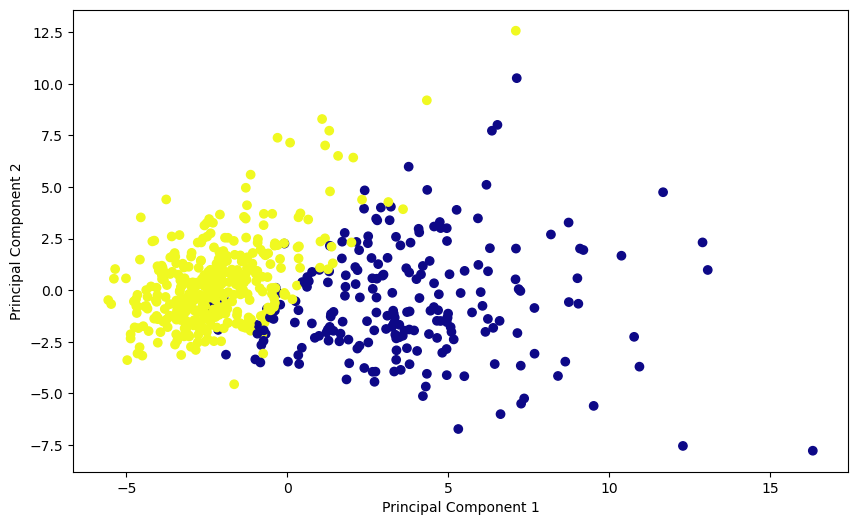

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dataset.target, cmap='plasma')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Anomaly detection - local outlier factor method

In [10]:
from sklearn.neighbors import LocalOutlierFactor

In [13]:
# Initialize LOF with contamination parameter (expected proportion of outliers)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the model and predict outliers (-1 for outliers, 1 for inliers)
outlier_labels = lof.fit_predict(pca_data)

print(f"Number of outliers detected: {sum(outlier_labels == -1)}")
print(f"Number of inliers: {sum(outlier_labels == 1)}")
print(f"Total data points: {len(outlier_labels)}")

Number of outliers detected: 57
Number of inliers: 512
Total data points: 569


In [14]:
outlier_labels

array([-1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [15]:
outliers=np.where(outlier_labels<0)

In [16]:
outliers

(array([  0,   3,   9,  38,  42,  59,  68,  71,  78,  82, 101, 108, 122,
        140, 151, 152, 157, 175, 176, 178, 180, 190, 192, 202, 212, 236,
        258, 261, 263, 265, 270, 277, 307, 308, 311, 314, 315, 318, 339,
        351, 352, 360, 368, 369, 376, 461, 491, 503, 504, 505, 520, 521,
        538, 539, 561, 567, 568], dtype=int64),)